In [2]:
import numpy as np
import random
import imageio
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Implementation of 4 functions:
# 1 - Limiarization
# 2 - 1D Filtering
# 3 - 2D Filtering with Limiarization
# 4 - 2D Median Filter

In [4]:
def RMSE(image1, image2):
    return np.float(np.sqrt(((image1 - image2)**2).mean()))

In [198]:
def limiarization(image, initial_threshold):
    
    filtered_image = np.zeros([image.shape[0], image.shape[1]])
    actual_threshold = initial_threshold
    diff = 1
    
    while(diff > 0.5):
        
        for i in range(image.shape[0]):
            for j in range(image.shape[1]):
                if image[i,j] > actual_threshold:
                    filtered_image[i,j] = 1
                else:
                    filtered_image[i,j] = 0

        group_of_1 = filtered_image*image
        group_of_0 = (1-filtered_image)*image
        
        new_threshold = (np.sum(group_of_1)/np.sum(filtered_image) + np.sum(group_of_0)/np.sum(1-filtered_image))/2

        diff = np.abs(new_threshold - actual_threshold)
        actual_threshold = new_threshold
    
    plt.imshow(filtered_image, cmap='gray');
    
    return RMSE(filtered_image, image)

149.55935890097078

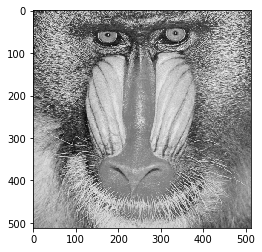

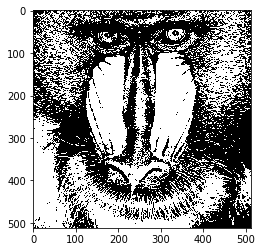

In [203]:
_ = plt.figure(figsize=(6,4))
image_test = imageio.imread('Casos_Teste/baboon.png')
plt.imshow(image_test, cmap='gray');
_ = plt.figure(figsize=(6,4))
limiarization(image_test, 200)

In [200]:
def filter_1D(image, size_filter, weights):
    
    reshaped_image = image.reshape(-1)
    index_range = len(reshaped_image) - size_filter + 1
    padding = int((len(reshaped_image) - index_range)/2) # It is divided by 2 because we need a symmetric padding
    reshaped_image = np.pad(reshaped_image, (padding,padding), mode='symmetric')
    
    filtered_image = []
    
    for index in range(len(reshaped_image) - size_filter + 1):
        filtered_image.append(np.sum(reshaped_image[index:size_filter+index] * weights))
    
    filtered_image = np.array(filtered_image).reshape(image.shape[0], image.shape[1])
    
    plt.imshow(filtered_image, cmap='gray');

    return RMSE(filtered_image, image)

95.80511625169086

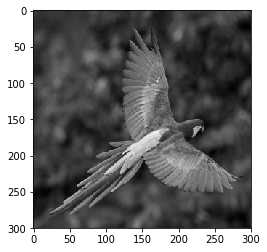

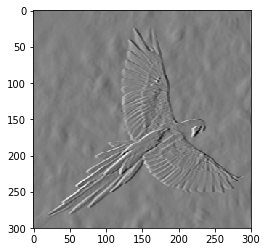

In [204]:
_ = plt.figure(figsize=(6,4))
image_test = imageio.imread('Casos_Teste/arara.png')
plt.imshow(image_test, cmap='gray');
_ = plt.figure(figsize=(6,4))
filter_1D(image_test, 5, [-2,-1,0,1,2])

In [173]:
x = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])
x

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [166]:
z = x.reshape(-1)
z

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [174]:
y = np.array([[1,2,3,4],
              [4,5,6,5],
              [7,8,9,6],
              [1,2,3,9]])
y

array([[1, 2, 3, 4],
       [4, 5, 6, 5],
       [7, 8, 9, 6],
       [1, 2, 3, 9]])

In [183]:
z = y.reshape(-1)
z

array([1, 2, 3, 4, 4, 5, 6, 5, 7, 8, 9, 6, 1, 2, 3, 9])

In [ ]:
def filter_2D(image, size_filter, weights, threshold):
    filtered_image = np.pad(image, (1,1), mode='symmetric')

In [ ]:
def median_filter_2D(image, size_filter):
    
    image = np.pad(image, (1,1), mode='symmetric')
    return 1